# Przygotowanie danych

In [8]:
import pandas as pd

no_movies = 193609
toy_story_id =1

file_path = 'ml-latest-small/ratings.csv'
# Caly plik rating.csv
rating = pd.read_csv(file_path)
# Wybranie identyfikatorow uzytkownikow ktorzy ocenili Toy Story
user_ids = rating[rating['movieId'] == toy_story_id]['userId'].unique()
# Wybranie uzytkownikow ktorzy ocenili toy Story
df = rating[rating['userId'].isin(user_ids)]

print(df.head())
print(len(user_ids))
print(df.dtypes)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
215
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


# Tworzenie macierzy 

Warto mieć na uwadze, że użytkownicy nie ocenili wszystkich filmów (wniosek z tego, że nie wszyscy ocenili Toy Story więc jeśli np 5 użytkownik nie ocenił filmu o indeksie 42 to wpisujemy 0 - zgodnie z myślą z wykładu )

In [9]:
import numpy as np

y = df[df['movieId'] == toy_story_id]
y = np.array(y['rating'])
y = y.reshape(-1, 1)

def create_X(df, m):
    index = pd.MultiIndex.from_product([df['userId'].unique(), np.arange(2, m + 1)], names=['userId', 'movieId'])
    X = pd.DataFrame(index=index).reset_index()
    X = pd.merge(X, df, how='left', on=['userId', 'movieId'])

    # Pivot the DataFrame to get a matrix of users' ratings for each movie
    X = X.pivot(index='userId', columns='movieId', values='rating')
    X = X.fillna(0)

    return np.array(X)

X = create_X(df, 10)
np.set_printoptions(threshold=np.inf)
print(X)

[[0.  4.  0.  0.  4.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [3.  0.  0.  0.  4.  0.  0.  0.  0. ]
 [3.  3.  0.  0.  0.  2.  0.  0.  2. ]
 [3.5 0.  0.  0.  0.  0.  0.  0.  5. ]
 [4.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  3.  0.  4.  0.  0.  4. ]
 [0.  3.  0.  0.  3.  4.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  5.  0.  5.  0.  5.  5.  0.  4. ]
 [0.  3.  0.  0.  3.  0.  0.  0.  0. ]
 [0.  0.  0.  3.  4.  3.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  3. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  3.  0.  0.  0.  3. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  3. ]
 [0.  3.5 0.  0.  4.5 0.  0.  0.  0. ]
 [0.  0.  0.  4.  0.  0.  0.  0.  0. ]
 [2.5 2.  0.  2.  4.  2.  0.  0.  4.5]
 [0.  0.  0.  0.  0.  3.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. 

# Podpunkt A

Troche o tym co w zasadzie robimy:

dla każdego z 215 użytkowników staramy się na podstawie ocen jakie wystawił dla m - filmów określić jaką ocenę wystawi dla filmu Toy Story 


regresja liniowa ma postać :

Y = f(X',B) + e 

gdzie :

Y -  prognoza (czyli dla i tego użytkownika to czego sie spodziewamy na i tej pozycji wektora y)

X' - wektor predyktorów  (czyli dla i tego użytkownika i'ty wiersz macierzy X)

B - wektor wspolczynnikow przy X 

e - blad losowy - szum

inaczej :

Y = X_1*B_1 + X_2*B2 + .... X_n*B_n + e


In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cały wybór odpowiednich współczynników B, (ustalenie postaci funkcji f) robi za nas Python 
def linear_regression(X, y):
    model = LinearRegression(fit_intercept=True, positive=True) #Ustawienie positive na False da lepsze wyniki w 1 podpunktcie i gorsze w 2
    model.fit(X, y)
    return model

# Nie jest to wymagane ale dla cwiczenia zapiszmy jaka formule wybral nam Python
def regression_formula(model):
    # wektor współczynników B
    coef = model.coef_
    # blad e
    intercept = model.intercept_
    equation = "y = " + " + ".join(f"{coef[i]}*x{i}" for i in range(len(coef))) + f" + {intercept}"
    return equation

# Na istniejacym juz podwykresie rysujemy "blad"  - dla ladniejszej wizualizacji
def plot_error(model, X, y, ax):
    y_pred = model.predict(X)
    residuals = y - y_pred
    ax.plot(range(len(y)), residuals, color='blue')
    # Dodatkowo zwracam Residual Sum of Squares
    return sum(residuals ** 2)



#Ciekawi mnie najwieksza ocena (najmniejsza to 0 )
print(np.max(X))
print(np.min(X))

5.0
0.0


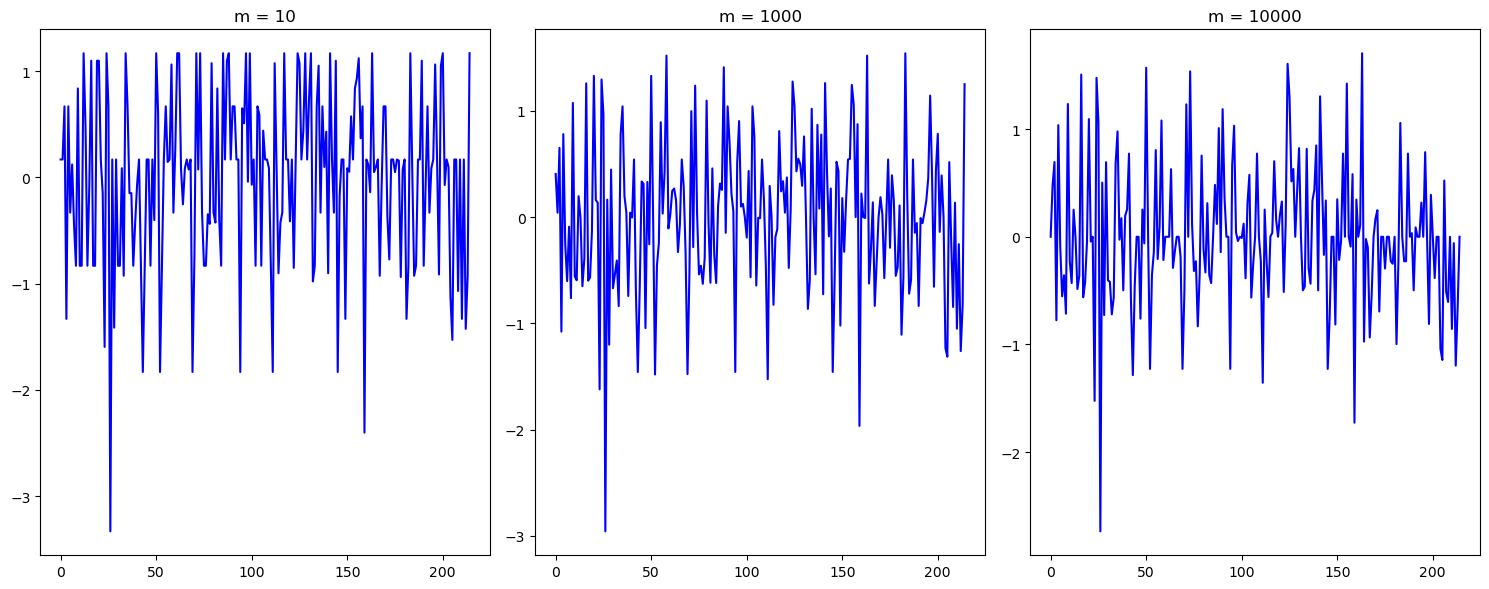

In [11]:
m_s = [10, 1000, 10000]
formulas = []
RSSs = []
scores = []

# Create a new figure
fig, axs = plt.subplots(1,len(m_s), figsize=(15,  6))

for i, m in enumerate(m_s):
    X = create_X(df, m)
    model = linear_regression(X, y)
    formulas.append(regression_formula(model))
    RSSs.append(plot_error(model, X, y, axs[i]))
    axs[i].set_title(f"m = {m}")
    scores.append(model.score(X, y))

plt.tight_layout()
plt.show()


In [12]:
print("Print RSS")
for rse in RSSs:
    print(rse)
print("Print formulas")
for formula in formulas:
    print(formula)
print("Scores")
for score in scores:
    print(score)

Print RSS
[142.79076262]
[111.26406221]
[91.30892429]
Print formulas
y = [0.         0.         0.         0.07914142 0.         0.
 0.03841561 0.14061237 0.0234943 ]*x0 + [3.83069433]
y = [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.45031741e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.13598718e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.98735173e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.

# Podpunkt B

m = 10
Test y = [5.] Pred y = [3.82484814]
Test y = [4.] Pred y = [4.15460664]
Test y = [4.] Pred y = [3.82484814]
Test y = [4.] Pred y = [3.92997987]
Test y = [3.] Pred y = [4.15455539]
Test y = [2.5] Pred y = [4.88624425]
Test y = [4.] Pred y = [3.82484814]
Test y = [4.] Pred y = [3.82484814]
Test y = [3.] Pred y = [4.13550536]
Test y = [4.] Pred y = [3.82484814]
Test y = [2.5] Pred y = [3.82484814]
Test y = [4.] Pred y = [3.82484814]
Test y = [2.5] Pred y = [3.96502378]
Test y = [3.] Pred y = [3.96502378]
Test y = [5.] Pred y = [3.82484814]
m = 100
Test y = [5.] Pred y = [3.75565674]
Test y = [4.] Pred y = [4.0105797]
Test y = [4.] Pred y = [3.88846723]
Test y = [4.] Pred y = [4.46441606]
Test y = [3.] Pred y = [5.0589211]
Test y = [2.5] Pred y = [5.3266634]
Test y = [4.] Pred y = [3.75565674]
Test y = [4.] Pred y = [3.94322263]
Test y = [3.] Pred y = [4.15147945]
Test y = [4.] Pred y = [3.89872572]
Test y = [2.5] Pred y = [4.64100436]
Test y = [4.] Pred y = [3.8368272]
Test y = [2.

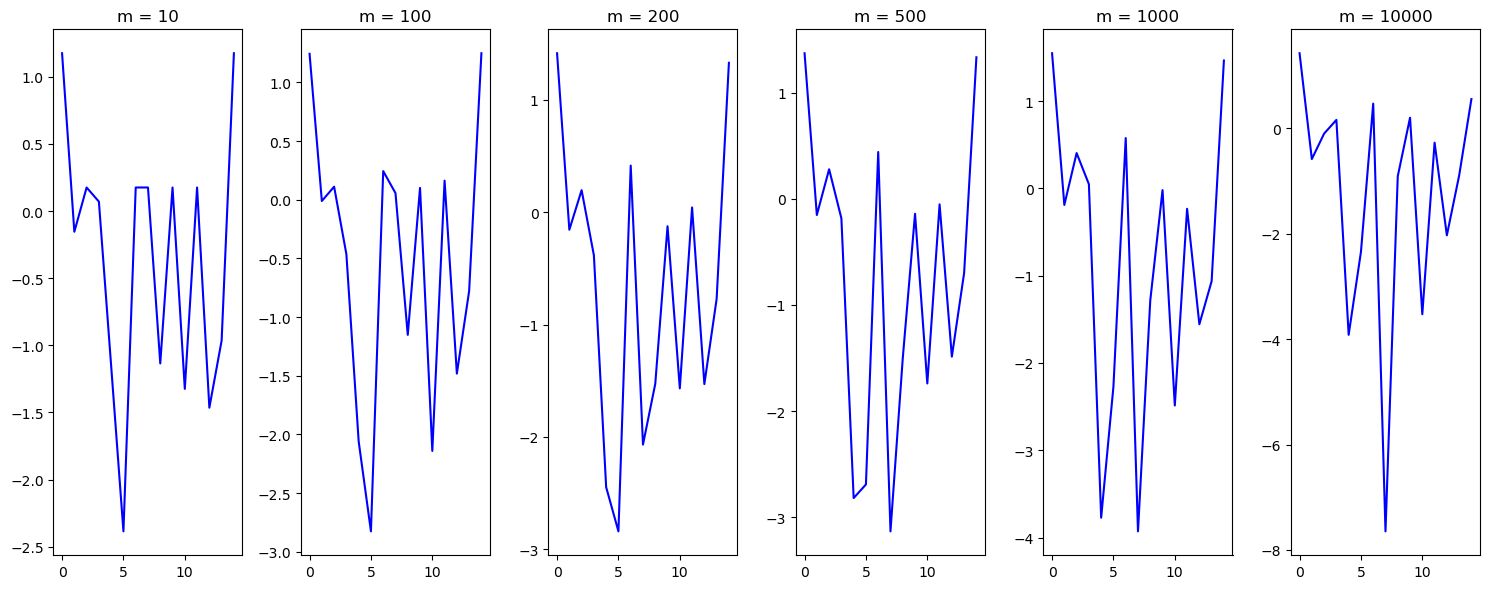

In [13]:
# Na istniejacym juz podwykresie rysujemy "blad"  - dla ladniejszej wizualizacji
# tym razem na podstawie predykcji
def plot_error_v2(model, X_test, y_test, ax,m):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    print(f"m = {m}")
    for i in range(len(residuals)):
            print(f"Test y = {y_test[i]} Pred y = {y_pred[i]}")
    ax.plot(range(len(y_test)), residuals, color='blue')
    # Dodatkowo zwracam Residual Sum of Squares
    return sum(residuals ** 2)


m_s = [10, 100, 200, 500, 1000, 10000]
formulas = []
RSSs = []
scores = []

fig, axs = plt.subplots(1,6, figsize=(15,  6))

for i, m in enumerate(m_s):
    X = create_X(df, m)
    X_train, X_test = X[:200,:], X[200:,:]
    y_train, y_test = y[:200], y[200:]
    model = linear_regression(X_train, y_train)
    formulas.append(regression_formula(model))
    RSSs.append(plot_error_v2(model, X_test, y_test, axs[i],m))
    axs[i].set_title(f"m = {m}")
    scores.append(model.score(X_test, y_test))

plt.tight_layout()
plt.show()



In [14]:
print("Print RSS")
for rse in RSSs:
    print(rse)
print("Scores")
for score in scores:
    print(score)

Print RSS
[16.09348107]
[24.37750014]
[30.23416498]
[37.02098445]
[51.33405494]
[100.57949849]
Scores
-0.6534398356177162
-1.5045376855271706
-2.1062498271485053
-2.80352579924754
-4.274046740782705
-9.333510118811265
